## EX7 Feature Extraction Techniques

### a) scale-invariant Feature Transform (SIFT)

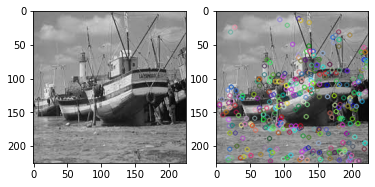

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./imgs/ship.jpg')
#plt.subplot(1, 2, 1)
plt.subplot(121)
plt.imshow(img)
# convert to greyscale
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# create SIFT feature extractor
sift = cv.SIFT_create()
# detect features from the image
kp = sift.detect(gray,None)
# draw the detected key points
img=cv.drawKeypoints(gray,kp,img)
plt.subplot(122)
plt.imshow(img)
plt.show()

### b) ORB(Oriented FAST and Rotated  BRIEF)

In [1]:
#b
import numpy as np
import cv2
# Read the query image as query_img and train image This query image is what you need #tofind in train image
# Save it in the same directory with the name image.jpg
query_img = cv2.imread('./imgs/ship.jpg')
train_img = cv2.imread('./imgs/ship.jpg')
# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()
# Now detect the keypoints and compute the descriptors for the query image and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)
# Initialize the Matcher for matching the keypoints and then match the # keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
# draw the matches to the final image containing both the images the drawMatches()
#function takes both images and keypoints and outputs the matched query image with its
#train image
final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)
final_img = cv2.resize(final_img, (1000,650))
# Show the final image
while(1):
    cv2.imshow("Matches", final_img)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cv2.destroyAllWindows()